# Easy Question #1

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_csv('dim_customer.json')
unique_customers_count = invoices_df['customer_id'].nunique()
print("Number of Unique Customers Shown:", unique_customers_count)


Number of Unique Customers Shown: 5191


# Easy Question # 2

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_csv('dim_customer.json')
unique_categories = invoices_df['category'].unique()
unique_categories_count = invoices_df['category'].nunique()
print("Different Categories of Products Available:", unique_categories)
print("Number of Unique Categories Shown:", unique_categories_count)


Different Categories of Products Available: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Number of Unique Categories Shown: 8


# Easy Question #3

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_csv('dim_customer.json')
popular_payment_method_shown = invoices_df['payment_method'].value_counts().idxmax()
popular_payment_method_times_used = invoices_df['payment_method'].value_counts().max()
print("Most Popular Payment Method Shown:", popular_payment_method_shown)
print("Number Of Times The Popular Payment Method Was Used:", popular_payment_method_times_used)


Most Popular Payment Method Shown: Cash
Number Of Times The Popular Payment Method Was Used: 44447


# Medium Question #1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_csv('dim_customer.json')
invoices_df['sales'] = invoices_df['quantity'] * invoices_df['price']
popular_categories = invoices_df.groupby('category')['sales'].sum().nlargest(3)
print("Three most popular categories by total sales:")
print(popular_categories)


Three most popular categories by total sales:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64


# Medium Question #2

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_json('dim_customer.json')
Custo = age_df.sort_values('id')
invoices_df['sales'] = invoices_df['quantity'] * invoices_df['price']
Inv = invoices_df.sort_values('customer_id')

merged_df = Inv.merge(Custo, how='inner', left_on='customer_id', right_on='id')
total_sales_over_45 = merged_df.loc[merged_df['age'] > 45, 'sales'].sum()

print("Total sales attributed to customers over the age of 45:", total_sales_over_45)

Total sales attributed to customers over the age of 45: 82039768.15



































# Medium Question #3

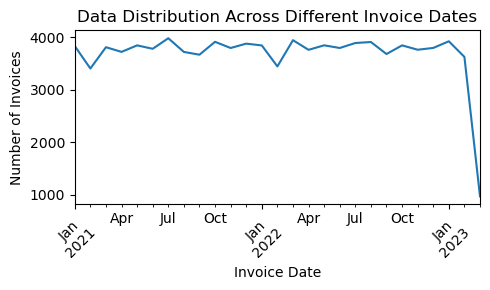

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_json('dim_customer.json')

invoices_df['invoice_date'] = pd.to_datetime(invoices_df['invoice_date'], dayfirst = True)
Counts_of_Dates = invoices_df.groupby(invoices_df['invoice_date'].dt.to_period('M')).size() 
plt.figure(figsize=(5, 3))
Counts_of_Dates.plot(kind='line')
plt.xlabel('Invoice Date')
plt.ylabel('Number of Invoices')
plt.title('Data Distribution Across Different Invoice Dates')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

# Hard Question #1

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
age_range = []

invoices_df = pd.read_csv('fct_invoice.csv')
age_df = pd.read_json('dim_customer.json')
Custo = age_df.sort_values('id')
invoices_df['sales'] = invoices_df['quantity'] * invoices_df['price']
Inv = invoices_df.sort_values('customer_id')

age_range = []
for x in Custo['age']:
    if x >= 10 and x < 20:
        age_range.append('10-19')
        
    elif x >= 20 and x < 30:
        age_range.append('20-29')
        
    elif x >= 30 and x < 40:
        age_range.append('30-39')
        
    elif x >= 40 and x < 50:
        age_range.append('40-49')
        
    elif x >= 50 and x < 60:
        age_range.append('50-59')
        
    elif x >= 60 and x < 70:
        age_range.append('60-69')
        
    elif x >= 70 and x < 80:
        age_range.append('70-79')
        
    elif x >= 80 and x < 90:
        age_range.append('80-89')
        
    else:
        age_range.append('NaN')
        
Custo['Age Range'] = age_range

merged_df = invoices_df.merge(Custo, how = 'inner', left_on = 'customer_id', right_on = 'id')
pd.pivot_table(merged_df, values = 'sales', index = 'category', columns = ['Age Range'], aggfunc = np.sum)

Age Range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,NaN
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,334012.05
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,46003764.40
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,2777362.62
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,345875.59
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,26468097.17
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,265661.04
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,23865450.00
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,1587210.24
